In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from statistics import mean
%matplotlib inline

In [2]:
df = pd.read_csv('Train.csv')
pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
df.count()

Item_Identifier              8523
Item_Weight                  7060
Item_Fat_Content             8523
Item_Visibility              8523
Item_Type                    8523
Item_MRP                     8523
Outlet_Identifier            8523
Outlet_Establishment_Year    8523
Outlet_Size                  6113
Outlet_Location_Type         8523
Outlet_Type                  8523
Item_Outlet_Sales            8523
dtype: int64

In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Text(0,0.5,'Sales Count')

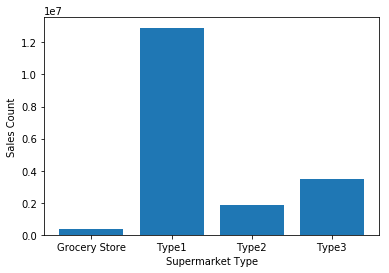

In [5]:
sales1=sales2=sales3=salesg=0

for i in range(0,len(df)):
    if df.loc[i]['Outlet_Type'] == 'Supermarket Type1':
        sales1+=df.loc[i]['Item_Outlet_Sales']
    elif df.loc[i]['Outlet_Type'] == 'Supermarket Type2':
        sales2+=df.loc[i]['Item_Outlet_Sales']
    elif df.loc[i]['Outlet_Type'] == 'Supermarket Type3':
        sales3+=df.loc[i]['Item_Outlet_Sales']
    else:
        salesg+=df.loc[i]['Item_Outlet_Sales']
fig,axes = plt.subplots()
axes.bar(['Type1','Type2','Type3','Grocery Store'],[sales1,sales2,sales3,salesg])
axes.set_xlabel('Supermarket Type')
axes.set_ylabel('Sales Count')

In [6]:
df[df['Outlet_Type']=='Grocery Store']['Outlet_Size'].replace(np.nan,'Small')
df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [7]:
one=int(1)
two=int(2)
ze=int(0)
mo = int(-1)
df['Outlet_Type_int'] = df['Outlet_Type'].map({'Supermarket Type1':1,'Supermarket Type2':2,'Supermarket Type3':3,'Grocery Store':4})
df.drop('Outlet_Type',inplace=True,axis=1)

df['Outlet_Size']=df['Outlet_Size'].map({'Small':1,'Medium':2,'High':3,np.nan:4 })

df['Fat_Content_int'] = df['Item_Fat_Content'].map({'LF':ze,'reg':one,'low fat':ze,'Low Fat':ze,'Regular':one})
df.drop('Item_Fat_Content',inplace=True,axis=1)

df['Item_Type_int'] = df['Item_Type'].map({'Dairy':1, 'Soft Drinks':2, 'Meat':3, 'Fruits and Vegetables':4,
       'Household':5, 'Baking Goods':6, 'Snack Foods':7, 'Frozen Foods':8,
       'Breakfast':9, 'Health and Hygiene':10, 'Hard Drinks':11, 'Breads':12,
       'Canned':13, 'Starchy Foods':14, 'Others':15, 'Seafood':16})
df.drop('Item_Type',inplace=True,axis=1)

df['Item_Visibility'].replace(0,0.06400489326611195,inplace=True)


In [8]:
df['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [9]:
df['Outlet_Identifier'] = [x[3:] for x in df['Outlet_Identifier']]

In [10]:
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Type_int,Fat_Content_int,Item_Type_int
0,FDA15,9.30,0.016047,249.8092,049,1999,2,Tier 1,3735.1380,1,0,1
1,DRC01,5.92,0.019278,48.2692,018,2009,2,Tier 3,443.4228,2,1,2
2,FDN15,17.50,0.016760,141.6180,049,1999,2,Tier 1,2097.2700,1,0,3
3,FDX07,19.20,0.064005,182.0950,010,1998,4,Tier 3,732.3800,4,1,4
4,NCD19,8.93,0.064005,53.8614,013,1987,3,Tier 3,994.7052,1,0,5


In [11]:
df[df['Outlet_Type_int']==3][:10]

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Type_int,Fat_Content_int,Item_Type_int
7,FDP10,NaN,0.127470,107.7622,027,1985,2,Tier 3,4022.7636,3,0,7
18,DRI11,NaN,0.034238,113.2834,027,1985,2,Tier 3,2303.6680,3,0,11
21,FDW12,NaN,0.035400,144.5444,027,1985,2,Tier 3,4064.0432,3,1,6
36,FDV20,NaN,0.059512,128.0678,027,1985,2,Tier 3,2797.6916,3,1,4
38,FDX10,NaN,0.123111,36.9874,027,1985,2,Tier 3,388.1614,3,1,7
39,FDB34,NaN,0.026481,87.6198,027,1985,2,Tier 3,2180.4950,3,0,7
62,FDF09,NaN,0.012090,38.2848,027,1985,2,Tier 3,484.7024,3,0,4
64,FDY45,NaN,0.026016,255.8356,027,1985,2,Tier 3,2543.3560,3,0,7
84,FDR12,NaN,0.031382,171.3764,027,1985,2,Tier 3,3091.9752,3,1,6
87,FDQ49,NaN,0.039058,155.9630,027,1985,2,Tier 3,3285.7230,3,1,9


In [12]:
item_weight = []
item_ID = []
for x in range(0,len(df)):
    if df.loc[x]['Item_Identifier'] not in item_ID and df.loc[x]['Item_Weight']!=np.nan:
        item_weight.append(df.loc[x]['Item_Weight'])
        item_ID.append(df.loc[x]['Item_Identifier'])


In [13]:
item_ID[0], item_weight[0]
item_Dict = {}
count =0 
item_Dict = dict(zip(item_ID,item_weight))
'''
for x in range(0,len(df)):
    if df.loc[x]['Item_Weight']==np.nan:
        count+=1
        df.loc[x]['Item_Weight']=item_Dict[df[x]['Item_Identifier']]'''
count

0

In [14]:
df['Item_Weight'] = df['Item_Weight'].fillna(df.Item_Identifier.map(item_Dict))
df[df['Outlet_Type_int']==3]

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Type_int,Fat_Content_int,Item_Type_int
7,FDP10,NaN,0.127470,107.7622,027,1985,2,Tier 3,4022.7636,3,0,7
18,DRI11,NaN,0.034238,113.2834,027,1985,2,Tier 3,2303.6680,3,0,11
21,FDW12,NaN,0.035400,144.5444,027,1985,2,Tier 3,4064.0432,3,1,6
36,FDV20,NaN,0.059512,128.0678,027,1985,2,Tier 3,2797.6916,3,1,4
38,FDX10,NaN,0.123111,36.9874,027,1985,2,Tier 3,388.1614,3,1,7
39,FDB34,NaN,0.026481,87.6198,027,1985,2,Tier 3,2180.4950,3,0,7
62,FDF09,NaN,0.012090,38.2848,027,1985,2,Tier 3,484.7024,3,0,4
64,FDY45,NaN,0.026016,255.8356,027,1985,2,Tier 3,2543.3560,3,0,7
84,FDR12,NaN,0.031382,171.3764,027,1985,2,Tier 3,3091.9752,3,1,6
87,FDQ49,NaN,0.039058,155.9630,027,1985,2,Tier 3,3285.7230,3,1,9


In [15]:
df.dropna(inplace=True)
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace=True)
df.count()

Item_Identifier              8169
Item_Weight                  8169
Item_Visibility              8169
Item_MRP                     8169
Outlet_Identifier            8169
Outlet_Establishment_Year    8169
Outlet_Size                  8169
Outlet_Location_Type         8169
Item_Outlet_Sales            8169
Outlet_Type_int              8169
Fat_Content_int              8169
Item_Type_int                8169
dtype: int64

In [16]:

#df['Item_Weight'].replace(np.nan,mean(df['Item_Weight']),inplace=True)

In [17]:
df['Outlet_Type_int'].unique()

array([1, 2, 4, 3], dtype=int64)

In [18]:
len(df.Item_Identifier.unique())

1555

In [19]:
df['Type'] = df['Item_Identifier'].apply(lambda x:x[:2])
df['Type'] = df['Type'].map({'FD':'1','DR':'2','NC':'3'})

In [20]:
df['Outlet_Location_Type_int'] = df['Outlet_Location_Type'].map({'Tier 1':1,'Tier 2':2,'Tier 3':3})

In [21]:
df['Tier_Visibility'] = df['Item_Visibility']*(df['Outlet_Type_int']/(df['Outlet_Size']+0.5))
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Type_int,Fat_Content_int,Item_Type_int,Type,Outlet_Location_Type_int,Tier_Visibility
0,FDA15,9.30,0.016047,249.8092,049,1999,2,Tier 1,3735.1380,1,0,1,1,1,0.006419
1,DRC01,5.92,0.019278,48.2692,018,2009,2,Tier 3,443.4228,2,1,2,2,3,0.015423
2,FDN15,17.50,0.016760,141.6180,049,1999,2,Tier 1,2097.2700,1,0,3,1,1,0.006704
3,FDX07,19.20,0.064005,182.0950,010,1998,4,Tier 3,732.3800,4,1,4,1,3,0.056893
4,NCD19,8.93,0.064005,53.8614,013,1987,3,Tier 3,994.7052,1,0,5,3,3,0.018287


Text(0,0.5,'Sales Count')

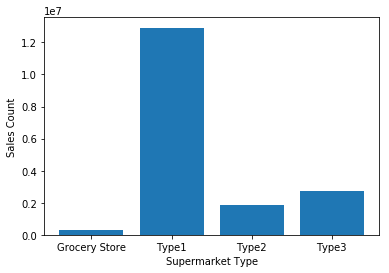

In [22]:
sales1=sales2=sales3=salesg=0

for i in range(0,len(df)):
    if df.loc[i]['Outlet_Type_int'] == 1:
        sales1+=df.loc[i]['Item_Outlet_Sales']
    elif df.loc[i]['Outlet_Type_int'] == 2:
        sales2+=df.loc[i]['Item_Outlet_Sales']
    elif df.loc[i]['Outlet_Type_int'] == 3:
        sales3+=df.loc[i]['Item_Outlet_Sales']
    else:
        salesg+=df.loc[i]['Item_Outlet_Sales']
fig,axes = plt.subplots()
axes.bar(['Type1','Type2','Type3','Grocery Store'],[sales1,sales2,sales3,salesg])
axes.set_xlabel('Supermarket Type')
axes.set_ylabel('Sales Count')

In [23]:
df['Outlet_Location_int'] = df['Outlet_Location_Type_int']/df['Outlet_Type_int']

In [24]:
x_train,x_test,y_train,y_test = train_test_split(df[['Outlet_Location_Type_int','Outlet_Location_int','Type','Tier_Visibility','Item_Type_int','Outlet_Type_int','Outlet_Size','Outlet_Establishment_Year','Outlet_Identifier','Item_MRP','Item_Visibility','Item_Weight']],df['Item_Outlet_Sales'])

In [25]:
lr = LinearRegression()

In [26]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [27]:
lr.score(x_test,y_test)*100

47.810334061477256

In [28]:
l = Lasso(alpha=0.05)
l.fit(x_train,y_train)
l.score(x_test,y_test)*100

47.81396139689607

In [29]:
r = Ridge(alpha=0.001,random_state=42)
r.fit(x_train,y_train)
r.score(x_test,y_test)*100

47.81036130072025

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
regr = RandomForestRegressor(max_depth=7, random_state=0,n_estimators=100)

In [38]:
regr.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [39]:
regr.score(x_test,y_test)*100

58.23354497033746

In [33]:
regr.feature_importances_

array([0.00124569, 0.16609919, 0.00090098, 0.01201477, 0.00739851,
       0.2033273 , 0.00068463, 0.0279318 , 0.00096617, 0.55216346,
       0.01125006, 0.01601744])

In [34]:
predictions = regr.predict(x_test)

In [35]:
diff = predictions - y_test

In [40]:
diff.mean()

-57.230819122063494